In [403]:
import sys
sys.path.append("../sturdystats/")
from api import Index

import requests

api_key = "wowsa"
BASE = "https://sturdystatistics.com/api/text/v1/index"
NAME = "hacker_news_comments_v7"

def get(url, params):
    res = requests.get(BASE + url , params={"api_key": api_key, **params})
    return res

index = Index(API_key="wowsa", name="hacker_news_comments_v7")

def get_docs(params):
    return get(f"/{index.id}/doc", params)

def get_topic_diff(params):
    return get(f"/{index.id}/topic/diff", params)


Found an existing index with id="index_ac07f8845e914efbb9ddc07676d0fda6".


### Make a very basic Search Query

In [452]:
res = get_docs(dict(query="reddit is cool", summarize_by="sentence")).json()

docs, topics, topic_groups = res["docs"], res["topics"], res["topic_groups"]

### Simple Return: a list of documents that match the query

In [405]:
doc = docs[0]

print(doc.keys())
print(doc["metadata"].keys())

dict_keys(['doc_id', 'metadata', 'predictions', 'text', 'topics'])
dict_keys(['c', 'doc', 'doc_id', 'folder_id', 'link', 'nu_post_id', 'ordered_doc_index', 'post_id', 'published', 'score', 'title'])


###  Each Doc has the most relevant sentence extracted

You can choose to extract either the most relevant `sentence, paragraph, or doc` in the `summarize_by` api option

In [406]:
for doc in docs[:5]:
    print("Title:", doc["metadata"]["title"])
    print("Published:", doc["metadata"]["published"])
    print("Content:", doc["text"])
    print("")

Title: Reddit
Published: 2014-09-30
Content: Most of them a griefers and almost all of them are looking for porn and other stuff like that.<p>I have a few small subreddits I get on that seem to be free of that:<p><a href="http://www.reddit.com/r/DiscordianHumanism/" rel="nofollow">http:&#x2F;&#x2F;www.reddit.com&#x2F;r&#x2F;DiscordianHumanism&#x2F;</a><p><a href="http://www.reddit.com/r/OS2/" rel="nofollow">http:&#x2F;&#x2F;www.reddit.com&#x2F;r&#x2F;OS2&#x2F;</a><p><a href="http://www.reddit.com/r/artificial/" rel="nofollow">http:&#x2F;&#x2F;www.reddit.com&#x2F;r&#x2F;artificial&#x2F;</a><p><a href="http://www.reddit.com/r/KindleFreebies/" rel="nofollow">http:&#x2F;&#x2F;www.reddit.com&#x2F;r&#x2F;KindleFreebies&#x2F;</a><p><a href="http://www.reddit.com/r/ebookdeals/" rel="nofollow">http:&#x2F;&#x2F;www.reddit.com&#x2F;r&#x2F;ebookdeals&#x2F;</a><p><a href="http://www.reddit.com/r/MachineLearning/" rel="nofollow">http:&#x2F;&#x2F;www.reddit.com&#x2F;r&#x2F;MachineLearning&#x2F;</a><p

### More Interesting: List of Topics

In [407]:
import pandas as pd

topic_df = pd.DataFrame(topics).dropna()
topic_df.head()

,executive_paragraph_summary,one_sentence_summary,prevalence,short_title,topic_group_id,topic_group_short_title,topic_id
0,The examples provided in this theme highlight ...,The theme explores the challenges and strategi...,0.412790,Community Moderation,3,Challenges and Risks,499
1,The theme of online discussion communities exp...,"The theme revolves around interactions, submis...",0.260843,Online Discussion Communities,9,Social and Cultural Issues,154
2,The theme explores various aspects such as the...,The theme revolves around issues related to mi...,0.146944,Misleading Stories,1,Miscellaneous,31
3,This theme explores the diversity of sources f...,Analysis of news and information sources like ...,0.069956,Tech News Sources,1,Miscellaneous,66
4,The theme delves into the intricacies and chal...,The examples discuss various issues and insigh...,0.025581,Social Media Platforms,3,Challenges and Risks,498


In [409]:
row = topic_df.iloc[0]
print("Title:", row.short_title)
print("Summary:", row.executive_paragraph_summary)

Title: Community Moderation
Summary: The examples provided in this theme highlight the various aspects of content moderation and community management on online platforms such as social media sites and forums. Discussions range from the need for auto-moderation to prevent harassment on platforms like Twitter and Facebook, to concerns about the loss of user content when forums migrate to new software. Examples also touch on the role of subreddits in providing curated content free from trolls and unwanted behavior, showcasing the effectiveness of community-driven moderation strategies in maintaining productive and engaging online spaces.


### Let's Explore these topics

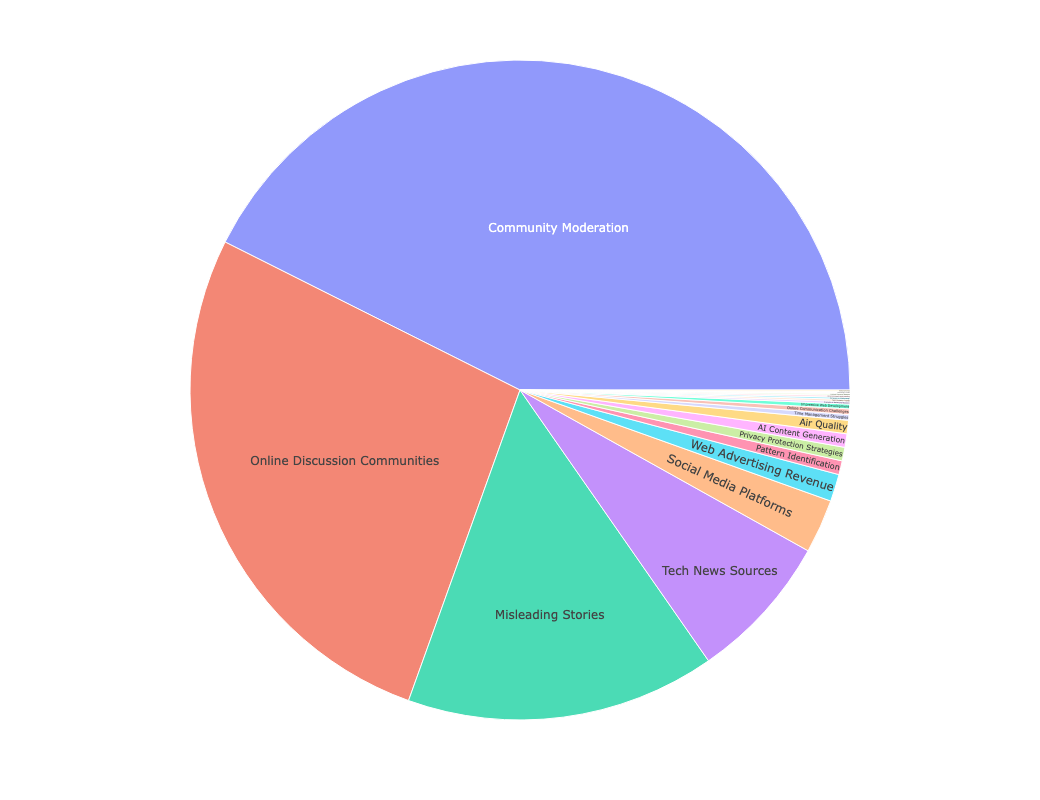

In [410]:
import plotly.express as px
%matplotlib inline

fig = px.sunburst(topic_df.iloc[:20], path=["short_title"], values="prevalence", hover_data=["one_sentence_summary", "topic_id"])
fig.update_layout(width=800, height=800)
fig

### Topics can allow you to explore the dataset without a query

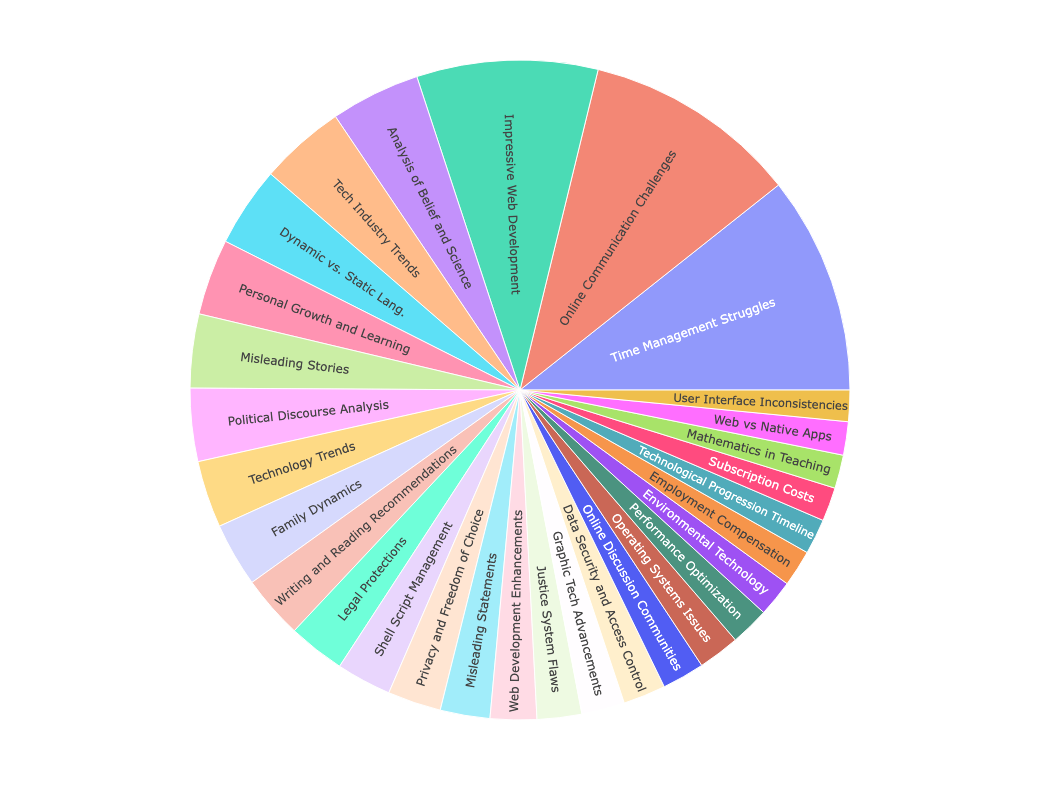

In [411]:
res = get_docs(dict(query="")).json()
docs, topics, topic_groups = res["docs"], res["topics"], res["topic_groups"]
topic_df = pd.DataFrame(topics).dropna()
topic_df.head()
fig = px.sunburst(topic_df.iloc[:30], path=["short_title"], values="prevalence", hover_data=["one_sentence_summary", "topic_id"], )
fig.update_layout(width=800, height=800)
fig

### Topic Groups
Can help you organize these granular topics

In [412]:
group_df = pd.DataFrame(topic_groups)
group_df.head(5)


,executive_paragraph_summary,one_sentence_summary,prevalence,short_title,topic_group_id
0,The topic of Programming and Software delves i...,A comprehensive exploration of various program...,0.105920,Programming and Software,4
1,The IT news trends encompass a wide array of t...,The recurring topic in IT news covers a broad ...,0.091838,Information Technology,2
2,The topic delves into various sub-themes such ...,"Exploring diverse engineering paths, CPU marke...",0.089296,Miscellaneous,1
3,The topic delves into a wide range of subjects...,"Exploring various innovations, challenges, and...",0.084579,Other,0
4,The topic of Communication and Interaction del...,The recurring topic of Communication and Inter...,0.067538,Communication and Interaction,7


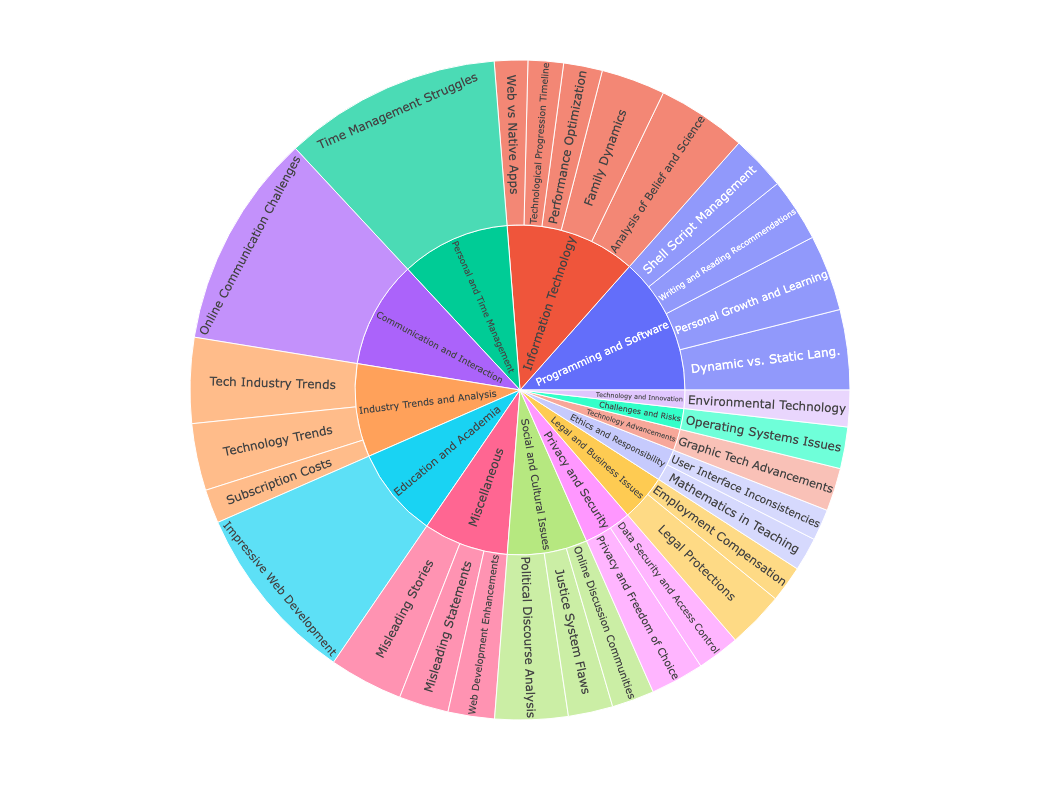

In [414]:
fig = px.sunburst(topic_df.iloc[:30], path=["topic_group_short_title", "short_title"], values="prevalence", hover_data=["one_sentence_summary", "topic_id"] )
fig.update_layout(width=800, height=800)
fig

# You can use these topics to pull up examples!

In [418]:
## Pick a topic w

topic_id = 139
res = get_docs(dict(topic_ids=f"{topic_id}", summarize_by="sentence")).json()

docs = res["docs"]
topic_df = pd.DataFrame(res["topics"]).dropna()
info = topic_df.loc[topic_df.topic_id == topic_id]
print("Topic:", info.short_title.values[0])
print("")

for doc in docs[:5]:
    print("Title:", doc["metadata"]["title"])
    print("Published:", doc["metadata"]["published"])
    print("Link", doc["metadata"]["link"])
    print("Content:", doc["text"])
    print("")

Topic: Political Discourse Analysis

Title: Leak uncovers global abuse of cyber-surveillance weapon
Published: 2021-07-18
Link https://news.ycombinator.com/item?id=27874027
Content: Glad to see reporting on this, but struggling to understand how it&#x27;s so much more outrageous than the UK&#x27;s own behaviour in this regard vis-a-vis Gamma Group and the Finspy &#x2F; Finfisher products.<p>For example:<p>&gt; Despite rules saying the UK should not export security goods to countries that might use them for internal repression, ministers have signed off more than £75m in such exports over the past five years to states rated “not free” by the NGO Freedom House.<p>&gt; The 17 countries include China, Saudi Arabia and Bahrain, as well as the United Arab Emirates, which was the biggest recipient of licences totalling £11.5m alone since 2015.<p>&gt; Human rights groups said the UK was developing a reputation for not conducting proper checks on who it sold arms to, while Labour called on the 

### You can also run semantic analysis with SQL

In [425]:
keyword = "openai"
res = get_topic_diff(dict(q1=f" search('{keyword}') ", )).json()
df = pd.DataFrame(res["topics"]).dropna()
df.head(5)

,confidence,executive_paragraph_summary,one_sentence_summary,prevalence,prevalence_ratio,short_title,topic_group_id,topic_group_short_title,topic_id
0,100,The theme explores the leadership dynamics wit...,"The examples highlight the leadership, moral c...",0.033889,100.000000,Leadership in OpenAI,15,Education and Academia,421
1,100,This theme delves into the realm of AI content...,The theme explores various aspects of AI-gener...,0.079854,58.694594,AI Content Generation,3,Challenges and Risks,117
2,100,The examples provided highlight various instan...,The theme explores instances of counterproduct...,0.001693,25.963278,Counter Productivity in Dev Practices,4,Programming and Software,255
3,100,This theme delves into the advancements and ch...,Exploring the advancements and challenges of A...,0.004196,20.537109,AI Chatbots,0,Other,321
4,100,The theme delves into the distinction between ...,The theme explores the contrast between intell...,0.001901,15.594758,Intelligence vs. Stupidity,0,Other,102


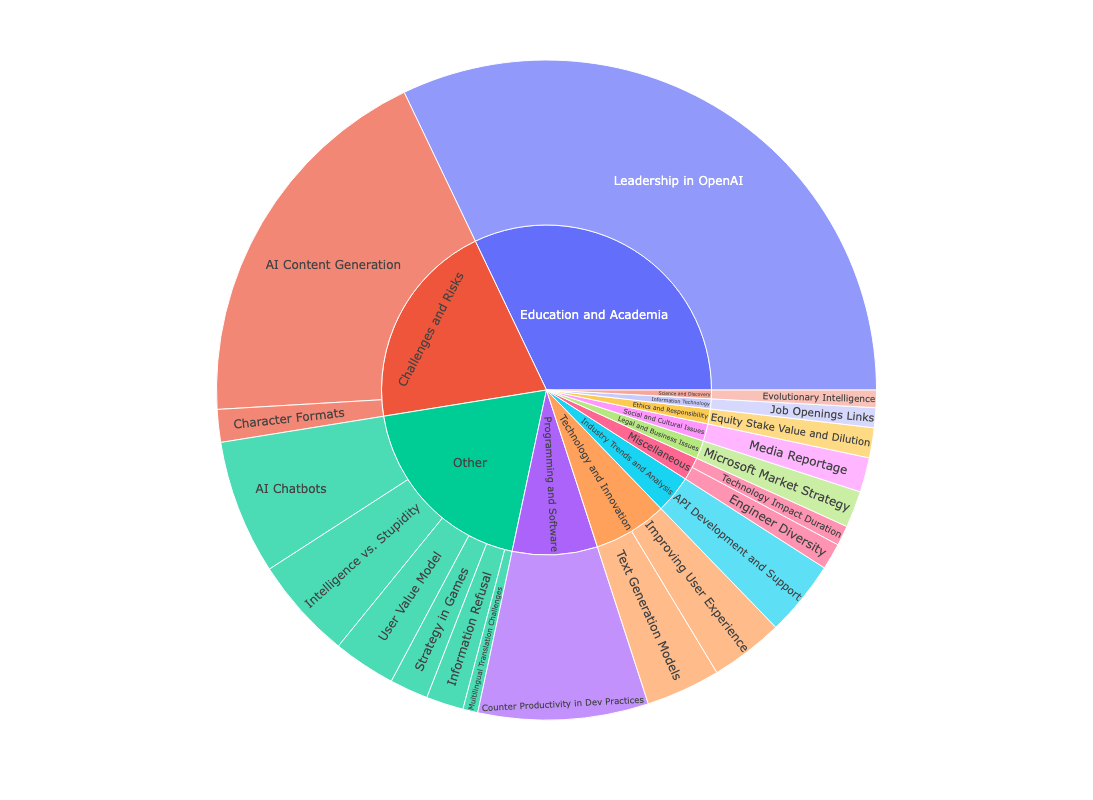

In [426]:
fig = px.sunburst(df.iloc[:30], path=["topic_group_short_title", "short_title"], values="prevalence_ratio", hover_data=["one_sentence_summary", "topic_id"] )
fig.update_layout(width=800, height=800)
fig

### You can chain filters together to refine your analysis

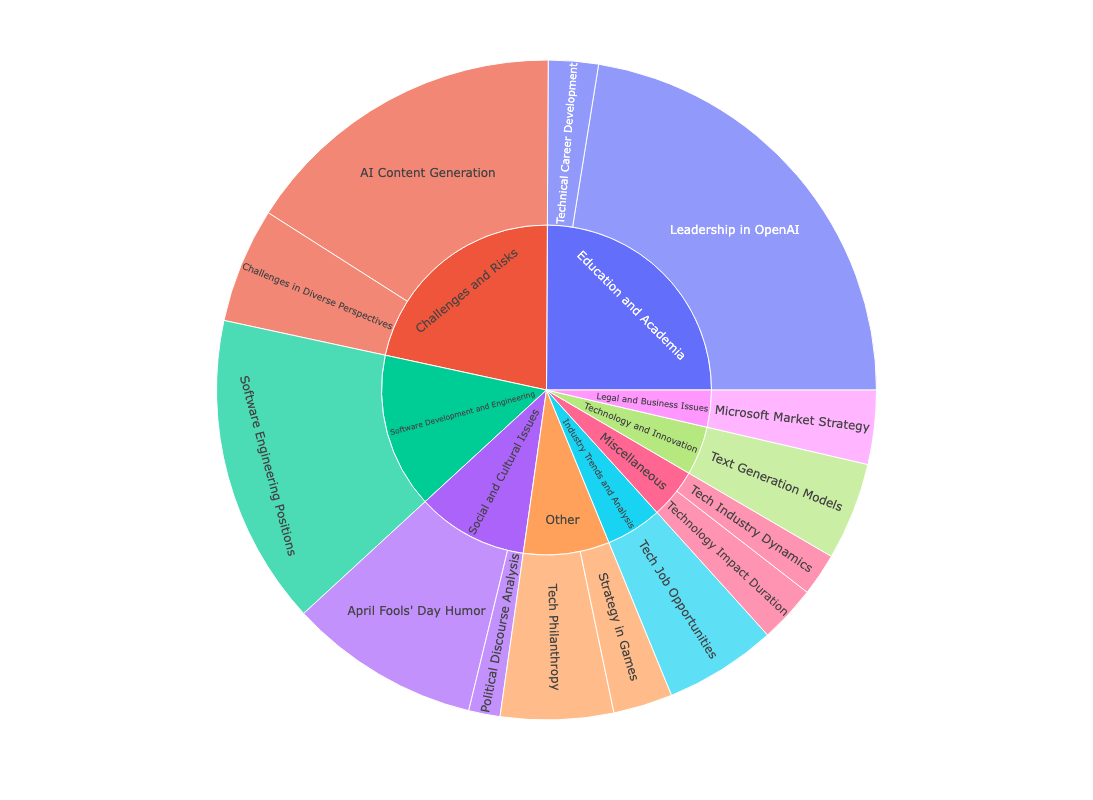

In [427]:
res = get_topic_diff(dict(q1=f" search('{keyword}') and published > '2024-01-01' ", )).json()
df = pd.DataFrame(res["topics"]).dropna()
fig = px.sunburst(df.iloc[:30], path=["topic_group_short_title", "short_title"], values="prevalence_ratio", hover_data=["one_sentence_summary", "topic_id"] )
fig.update_layout(width=800, height=800)
fig

### You can even specify the alternative subset to compare outliers

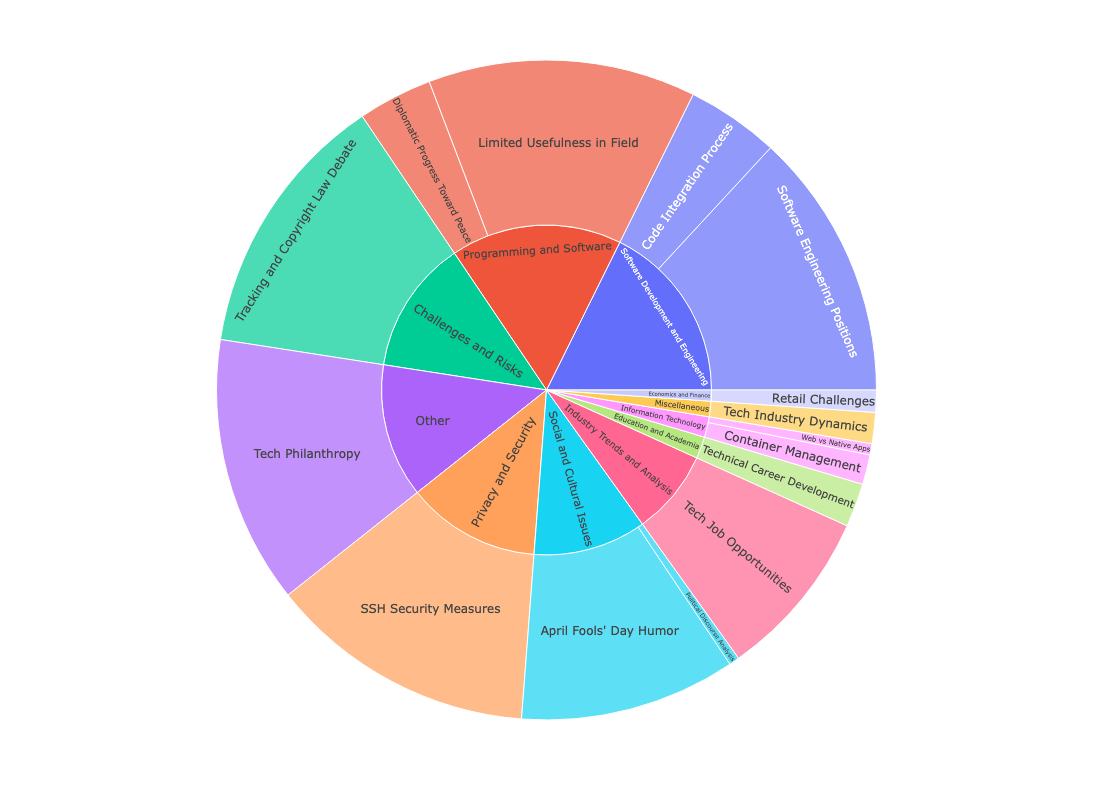

In [428]:
res = get_topic_diff(dict(q1=f" search('{keyword}') and published > '2024-01-01' ",
                          q2=f" search('{keyword}') and published < '2024-01-01' " )).json()
df = pd.DataFrame(res["topics"]).dropna()
fig = px.sunburst(df.iloc[:30], path=["topic_group_short_title", "short_title"], values="prevalence_ratio", hover_data=["one_sentence_summary", "topic_id"] )
fig.update_layout(width=800, height=800)
fig

## We can even do a time analysis on any topic

In [435]:
buckets = [ f"{i}-01-01" for i in range(2015, 2026) ]
dfs = []
for i in range(1, len(buckets)):
    start = buckets[i-1]
    end = buckets[i]
    query = f"published > '{start}' and published < '{end}'"
    tmp = pd.DataFrame(get_topic_diff(dict(q1=query, cutoff=-1, min_confidence=-1, limit=100000)).json()["topics"]).dropna()
    tmp["time_range"] = start[:4] + "->" + end[:4]
    dfs.append(tmp)

df = pd.concat(dfs)

### You can query docs with the exact same filters to pull up examples

In [442]:
res = get_docs(dict(topic_ids=f"{topic_id}", filters="published>'2020-01-01'", summarize_by="sentence")).json()

docs = res["docs"]
topic_df = pd.DataFrame(res["topics"]).dropna()
info = topic_df.loc[topic_df.topic_id == topic_id]
print("Topic:", info.short_title.values[0])
print("")

for doc in docs[:5]:
    print("Title:", doc["metadata"]["title"])
    print("Published:", doc["metadata"]["published"])
    print("Link", doc["metadata"]["link"])
    print("Content:", doc["text"])
    print("")

Topic: US Political Landscape

Title: De-Googling: My Progress
Published: 2020-04-28
Link https://news.ycombinator.com/item?id=23015354
Content: Replaced Chrome browser with Firefox<p>Replaced Google search with DuckDuckGo<p>Replaced Gmail with ProtonMail<p>Replaced Google Maps with OpenStreetMap<p>Replaced Hangouts with Telegram<p>Replaced Google for news with Feedly<p>Replaced Google Translate with

Title: Intel apologises in China over Xinjiang supplier statement
Published: 2021-12-23
Link https://news.ycombinator.com/item?id=29659905
Content: Should we demand that companies avoid California suppliers as well because of the extensive use of prison labor:<p><a href="https:&#x2F;&#x2F;www.latimes.com&#x2F;california&#x2F;story&#x2F;2020-10-11&#x2F;california-prison-factories-inmates-covid-19" rel="nofollow">https:&#x2F;&#x2F;www.latimes.com&#x2F;california&#x2F;story&#x2F;2020-10-11&#x2F;californ...</a><p><a href="https:&#x2F;&#x2F;www.usatoday.com&#x2F;story&#x2F;opinion&#x2F;policin